<a href="https://colab.research.google.com/github/ArtemMusienko/Solving-interview-tasks/blob/main/%D0%A0%D0%B5%D1%88%D0%B5%D0%BD%D0%B8%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D1%87_%D0%B4%D0%BB%D1%8F_%D1%81%D0%BE%D0%B1%D0%B5%D1%81%D0%B5%D0%B4%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задача №1

## Условие задачи:

Нужно сгенерировать синтетический датасет для задачи классификации, построить модели с использованием различных алгоритмов, провести поиск наилучших гиперпараметров и оценить качество моделей с использованием коэффициента Джини.

**Генерация данных:**

Сгенерируйте датасет, содержащий 1000 наблюдений и 2 признака с помощью функции `make_blobs` из библиотеки `sklearn`. Используйте 2 центра кластеров, стандартное отклонение кластеров установите на 3.8, диапазон значений центров установите на (-6.0, 6.0), зафиксируйте случайное состояние генерации на 42.

**Разделение данных:**

Разделите датасет на тренировочную (70%) и тестовую (30%) выборки.

**Визуализация данных:**

Постройте график рассеяния, чтобы визуализировать синтетический датасет, где разные классы окрашены различными цветами.

**Масштабирование данных:**

Выполните стандартизацию признаков с помощью `StandardScaler`.

**Построение моделей:**

Постройте модели с использованием следующих алгоритмов:

*   Логистическая регрессия (**Logistic Regression**);
*   Машина опорных векторов (**SVM**);
*   Дерево решений (**Decision Tree**);
*   Случайный лес (**Random Forest**).

**Поиск гиперпараметров:**

Используйте метод сеточного поиска (`GridSearchCV`) для поиска наилучших гиперпараметров для каждой модели.

**Гиперпараметры для поиска:**

*   Логистическая регрессия: C (0.1, 1, 10);
*   SVM: C (0.1, 1, 10) и gamma (0.01, 0.1, 1);
*   Дерево решений: max_depth (5, 10, 20) и min_samples_split (2, 5, 10);
*   Случайный лес: n_estimators (10, 50, 100) и max_depth (5, 10, 20).

**Оценка качества моделей:**

Оцените качество моделей на тестовой выборке, коэффициент Джини. Выведите лучшие параметры и значение коэффициента Джини для каждой модели.

## Решение задачи

Импортируем библиотеки:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

Выполним генерацию датасета и разделение данных:

In [ ]:
# Генерация датасета
X, y = make_blobs(n_samples=1000, n_features=2, centers=2, cluster_std=3.8, center_box=(-6.0, 6.0), random_state=42)

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Выполним визуализацию данных, построив график рассеяния с разными цветами для классов:

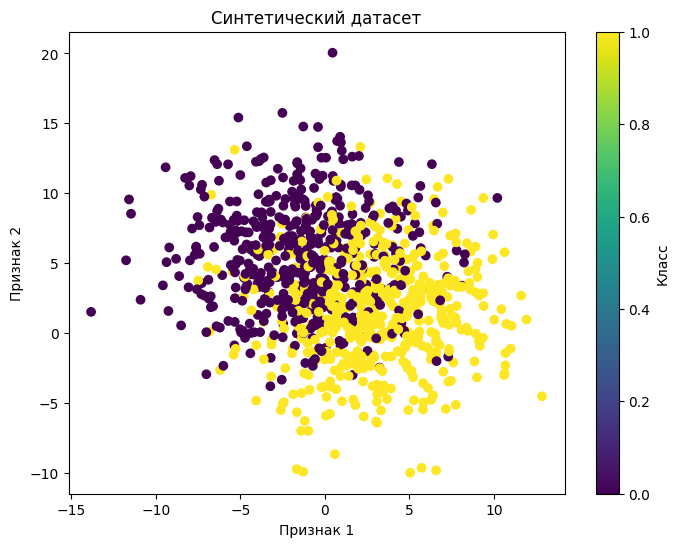

In [ ]:
# Визуализация данных
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title('Синтетический датасет')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.colorbar(label='Класс')
plt.show()

Выполним масштабирование данных:

In [ ]:
# Масштабирование данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Создадим словарь `models`, который определяет каждую модель с базовыми настройками:

In [ ]:
# Модели и сетки гиперпараметров
models = {
    'LogisticRegression': (LogisticRegression(), {'C': [0.1, 1, 10]}),
    'SVM': (SVC(kernel='rbf', probability=True), {'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1]}),
    'DecisionTree': (DecisionTreeClassifier(), {'max_depth': [5, 10, 20], 'min_samples_split': [2, 5, 10]}),
    'RandomForest': (RandomForestClassifier(), {'n_estimators': [10, 50, 100], 'max_depth': [5, 10, 20]})
}

Напишем функцию, которая будет выщитывать **коэффициент Джини**:

In [ ]:
# Функция для расчета коэффициента Джини
def gini_score(y_true, y_pred_proba):
    auc = roc_auc_score(y_true, y_pred_proba[:, 1])
    return 2 * auc - 1

Обучение и оценка моделей:

In [ ]:
results = {}  # Инициализация пустого словаря для хранения результатов каждой модели (лучшие параметры и Gini)
for name, (model, param_grid) in models.items():  # Цикл по всем моделям: для каждой извлекаем имя, базовую модель и сетку гиперпараметров
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='roc_auc')  # Создание объекта GridSearchCV для поиска лучших гиперпараметров с 5-кратной кросс-валидацией и метрикой ROC-AUC
    grid_search.fit(X_train_scaled, y_train)  # Обучение GridSearchCV на масштабированных тренировочных данных
    best_model = grid_search.best_estimator_  # Получение лучшей модели после поиска гиперпараметров
    y_pred_proba = best_model.predict_proba(X_test_scaled)  # Предсказание вероятностей классов на тестовых данных с использованием лучшей модели
    gini = gini_score(y_test, y_pred_proba)  # Расчет коэффициента Джини на основе предсказанных вероятностей и истинных меток
    results[name] = {'best_params': grid_search.best_params_, 'gini': gini}  # Сохранение лучших параметров и Gini в словаре результатов для текущей модели
    print(f"{name}: Лучшие параметры {grid_search.best_params_}, Gini {gini:.4f}")  # Вывод на экран имени модели, лучших параметров и значения Gini с 4 знаками после запятой

LogisticRegression: Лучшие параметры {'C': 0.1}, Gini 0.8131
SVM: Лучшие параметры {'C': 10, 'gamma': 0.01}, Gini 0.8176
DecisionTree: Лучшие параметры {'max_depth': 5, 'min_samples_split': 10}, Gini 0.6884
RandomForest: Лучшие параметры {'max_depth': 5, 'n_estimators': 100}, Gini 0.7885


Конечный вывод результатов:

In [ ]:
# Вывод результатов
print("Результаты:")
for name, res in results.items():
    print(f"{name}: {res}")

Результаты:
LogisticRegression: {'best_params': {'C': 0.1}, 'gini': np.float64(0.8131472509889328)}
SVM: {'best_params': {'C': 10, 'gamma': 0.01}, 'gini': np.float64(0.8175918929730213)}
DecisionTree: {'best_params': {'max_depth': 5, 'min_samples_split': 10}, 'gini': np.float64(0.6884305969154185)}
RandomForest: {'best_params': {'max_depth': 5, 'n_estimators': 100}, 'gini': np.float64(0.7885239343970845)}


# Задача №2


## Условие задачи:

Нужно сгенерировать синтетический датасет для задачи регрессии, построить модель с использованием бэггинга, провести анализ результатов и оценить качество модели.

**Генерация данных:**

Сгенерируйте датасет, содержащий 1000 наблюдений и 10 признаков.
Пусть целевая переменная y будет линейной комбинацией признаков с добавлением гауссовского шума. Используйте (`coefficients = np.random.randn(n_features)`).
Разделите датасет на тренировочную (80%) и тестовую (20%) выборки.

**Построение модели:**

Постройте модель с использованием бэггинга, где базовым алгоритмом будет линейная регрессия.
Оцените качество модели на тестовой выборке с использованием метрик **MSE** (**Mean Squared Error**) и **R^2** (**коэффициент детерминации**).

**Анализ:**

Проверьте мультиколлинеарность признаков (например, с помощью **коэффициента корреляции** и **VIF**).
Проведите анализ остатков модели (например, постройте графики остатков и проверьте их распределение).
Оцените важность признаков (например, с помощью коэффициентов модели).

## Решение задачи

Импорт библиотек:

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns

Выполним генерацию синтетического датасета и выполним разделение данных:

In [ ]:
# Задаем переменные
n_samples = 1000
n_features = 10

X = np.random.randn(n_samples, n_features) # Генерация матрицы признаков

coefficients = np.random.randn(n_features) # Генерация коэффициентов

noise = np.random.normal(0, 1, n_samples) # Генерация шума

y = np.dot(X, coefficients) + noise # Вычисление целевой переменной

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Разделение данных

Построим модель с импользованием бэггинга:

In [ ]:
# Построение модели
base_model = LinearRegression()
bagging_model = BaggingRegressor(estimator=base_model, n_estimators=100, random_state=42)
bagging_model.fit(X_train, y_train)
y_pred = bagging_model.predict(X_test)

Оценим качества обучения модели на метриках **MSE** и **r2**:

In [ ]:
# Оценка качества
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse:.4f}")
print(f"r2: {r2:.4f}")

MSE: 0.9523
r2: 0.8597


Выполним анализ мультиколлинеарности признаков с помощью **коэффициента корреляции** и **VIF**:

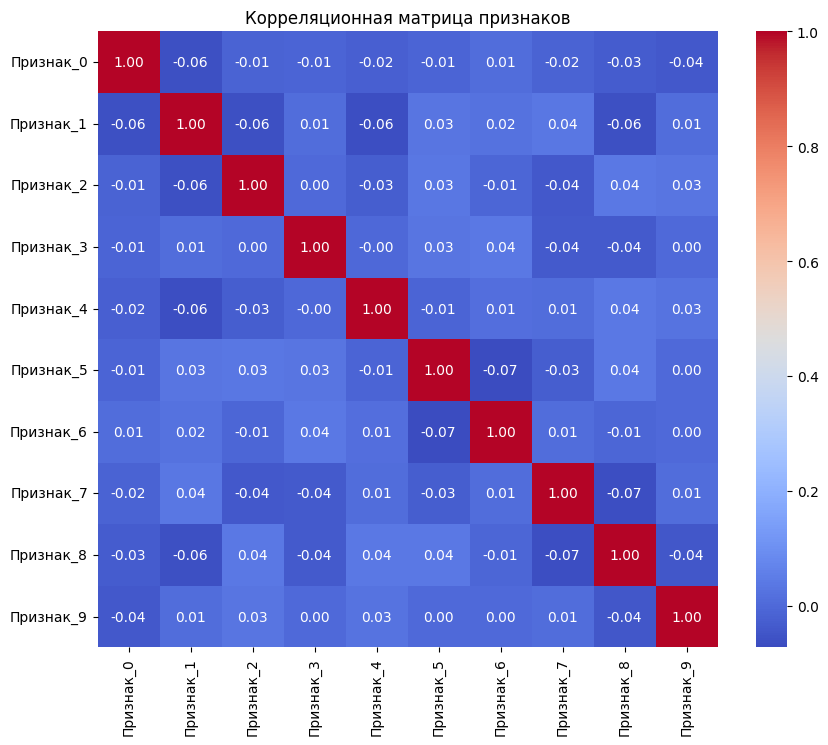

VIF для каждого признака:
    Признаки       VIF
0  Признак_0  1.008880
1  Признак_1  1.018831
2  Признак_2  1.010091
3  Признак_3  1.005908
4  Признак_4  1.008445
5  Признак_5  1.011101
6  Признак_6  1.007761
7  Признак_7  1.009569
8  Признак_8  1.016659
9  Признак_9  1.005541


In [ ]:
df = pd.DataFrame(X, columns=[f'Признак_{i}' for i in range(n_features)])
# Вычисляем матрицу парных корреляций между всеми признаками
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляционная матрица признаков')
plt.show()

# Расчет VIF — основной показатель мультиколлинеарности
vif_data = pd.DataFrame()
vif_data["Признаки"] = df.columns
vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
print("VIF для каждого признака:")
print(vif_data)

Проведем анализ остатков модели, построив график остатков и их распределение:

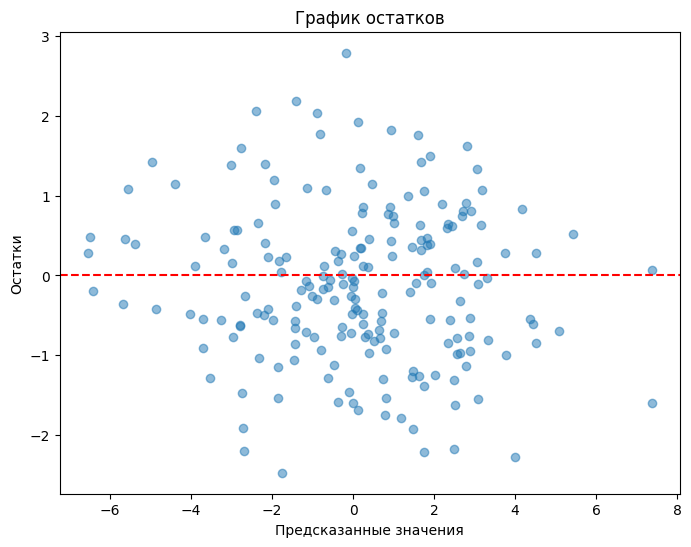

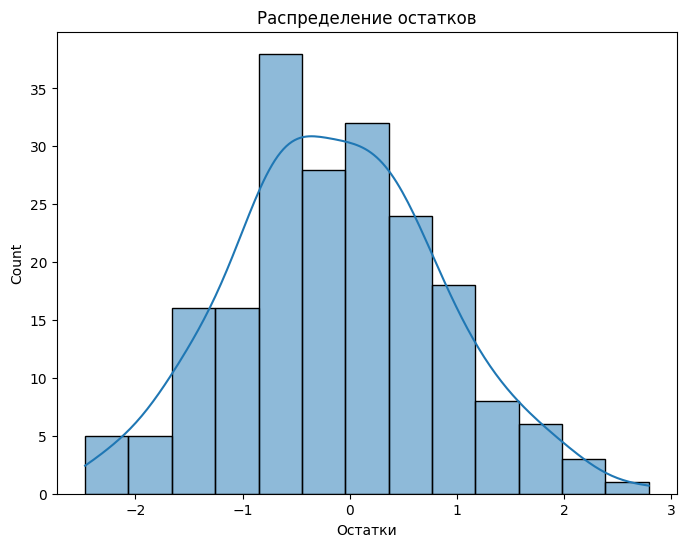

In [ ]:
# Вычисление остатков
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='r', linestyle='--')
plt.title('График остатков')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title('Распределение остатков')
plt.xlabel('Остатки')
plt.show()

Проведем оценку важности признаков с помощью коэффициентов модели:

In [ ]:
# Собираем коэффициенты из всех базовых моделей бэггинга
coefficients_list = [estimator.coef_ for estimator in bagging_model.estimators_]

# Усредняем коэффициенты — получаем стабильную оценку важности признаков
avg_coefficients = np.mean(coefficients_list, axis=0)

feature_importance = pd.DataFrame({'Признаки': df.columns, 'Коэффициент': avg_coefficients})
print("Средние коэффициенты признаков:")
# Сортировка по модулю коэффициента — показывает реальную значимость признаков
print(feature_importance.sort_values(by='Коэффициент', key=abs, ascending=False))

Средние коэффициенты признаков:
    Признаки  Коэффициент
6  Признак_6    -1.443306
2  Признак_2     1.131890
5  Признак_5    -1.018105
3  Признак_3    -0.781825
0  Признак_0    -0.659605
1  Признак_1     0.533934
8  Признак_8     0.408170
9  Признак_9     0.228984
7  Признак_7    -0.204293
4  Признак_4    -0.033742


# Задача №3

## Условие задачи:

Нужно сгенерировать синтетический временной ряд, построить модели для прогнозирования временного ряда с использованием различных алгоритмов, провести анализ результатов и оценить качество моделей.

**Генерация данных:**

Сгенерируйте синтетический временной ряд, содержащий 1000 наблюдений, представляющий собой сумму синусоидальной функции, тренда и случайного шума.

**Разделение данных:**

Разделите временной ряд на тренировочную (80%) и тестовую (20%) выборки.

**Визуализация данных:**

Постройте график временного ряда, чтобы визуализировать синтетические данные.

**Построение моделей:**

Постройте модели для прогнозирования временного ряда с использованием следующих алгоритмов:

*   Автокорреляционная модель (**AR**);
*   Модель экспоненциального сглаживания (**ETS**).

**Оценка качества моделей:**

Оцените качество моделей на тестовой выборке с использованием метрик **MAE** (**Mean Absolute Error**) и **RMSE** (**Root Mean Squared Error**).

**Визуализация прогнозов:**

Постройте графики, сравнивающие истинные значения временного ряда и прогнозы каждой модели на тестовой выборке.

## Решение задачи

Импортируем библиотеки:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.model_selection import train_test_split

Генерация синтетического временного ряда:

In [3]:
n_samples = 1000
t = np.arange(n_samples)
trend = 0.01 * t # Линейный тренд
sinusoidal = np .sin(2 * np.pi * t / 50) # Синусоидальная компонента с периодом 50
noise = np.random.normal(0, 0.5, n_samples) # Гауссовский шум
y = trend + sinusoidal + noise

Преобразование в pandas Series:

In [4]:
ts = pd.Series(y, index=pd.date_range(start='2000-01-01', periods=n_samples, freq='D'))

Выполним разделение данных:

In [5]:
train, test = train_test_split(ts, test_size=0.2, shuffle=False)

Выполниим визуализацию данных:

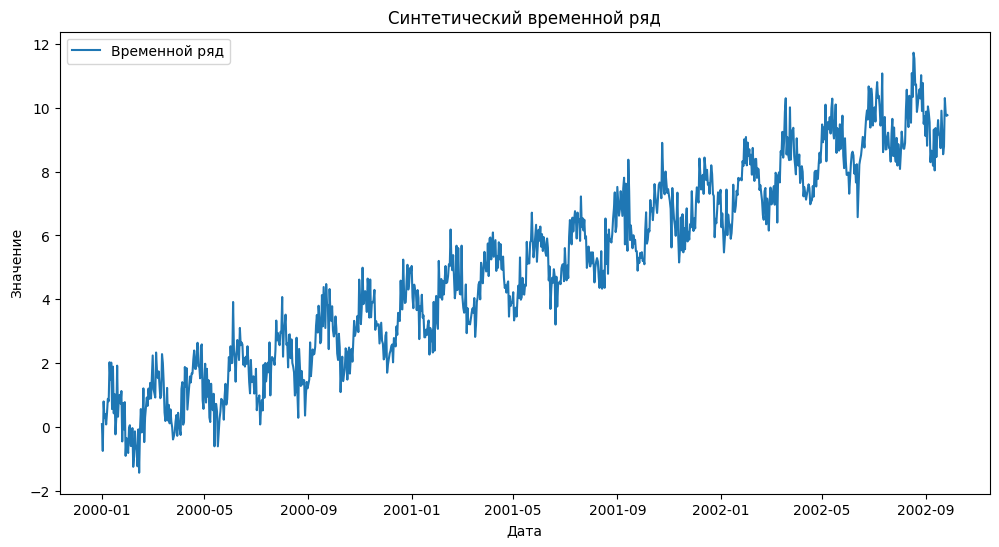

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(ts, label='Временной ряд')
plt.title('Синтетический временной ряд')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.legend()
plt.show()

Выполним построение модели:

In [8]:
# Модель AR
ar_model = AutoReg(train, lags=50).fit()
ar_pred = ar_model.predict(start=len(train), end=len(train)+len(test)-1)

# Модель ETS
ets_model = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=50).fit()
ets_pred = ets_model.forecast(len(test))

Создадим функцию для оценки качества:

In [12]:
def evaluate_model(true, pred):
    mae = mean_absolute_error(true, pred)
    rmse = np.sqrt(mean_squared_error(true, pred))
    return mae, rmse

Воспользуемся функцией и выведем результаты:

In [13]:
ar_mae, ar_rmse = evaluate_model(test, ar_pred)
ets_mae, ets_rmse = evaluate_model(test, ets_pred)

print(f'AR модель: MAE = {ar_mae: .4f}, RMSE = {ar_rmse: .4f}')
print(f'ETS модель: MAE = {ets_mae: .4f}, RMSE = {ets_rmse: .4f}')

AR модель: MAE =  0.4112, RMSE =  0.5255
ETS модель: MAE =  0.4176, RMSE =  0.5310


Выполним визуализацию прогнозов:

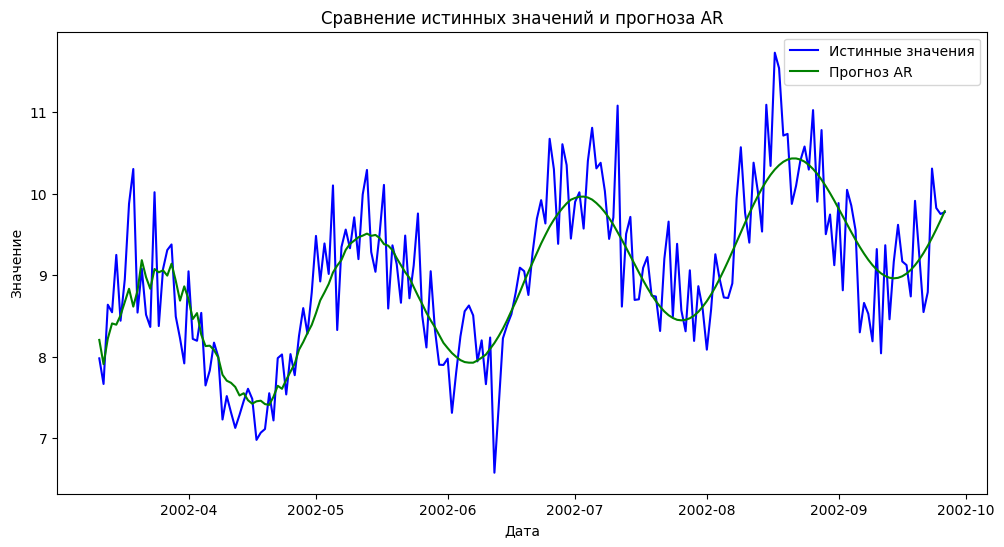

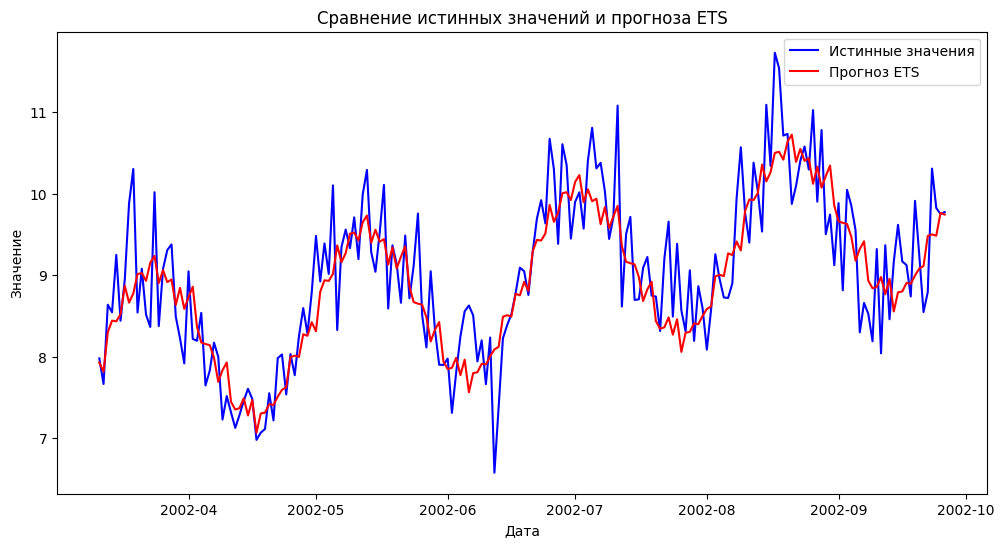

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(test, label='Истинные значения', color='blue')
plt.plot(ar_pred, label='Прогноз AR', color='green', linestyle='-')
plt.title('Сравнение истинных значений и прогноза AR')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(test, label='Истинные значения', color='blue')
plt.plot(ets_pred, label='Прогноз ETS', color='red', linestyle='-')
plt.title('Сравнение истинных значений и прогноза ETS')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.legend()
plt.show()